In [1]:
import mlflow
import numpy as np
import seaborn
from urllib.parse import urlparse
import glob
import os
import matplotlib.pyplot as plt
import sklearn.preprocessing
import sklearn.model_selection

import relspecs
import diagnostics
import relspecs
import utils

seaborn.set(rc={'figure.figsize':(27,9)})

def load(prefix):
    return utils.load_npa_artifact("autoencoder_baseline","db2b0809c701497e829cc95c3dbdfa72",prefix=prefix)


In [2]:
val_mae = load("mae_per_feature_val")
train_mae = load("mae_per_feature_train")


In [3]:
currencies = relspecs.get_codelists()['Currency']
print(currencies[48],currencies[51],currencies[66:69],currencies[152:155])

EUR GBP ['INR', 'IQD', 'IRR'] ['USD', 'USN', 'USS']


In [4]:
rel = relspecs.rels['budget']

(201, 211)
vmin 2.00971e-10 vmax 1.1352328


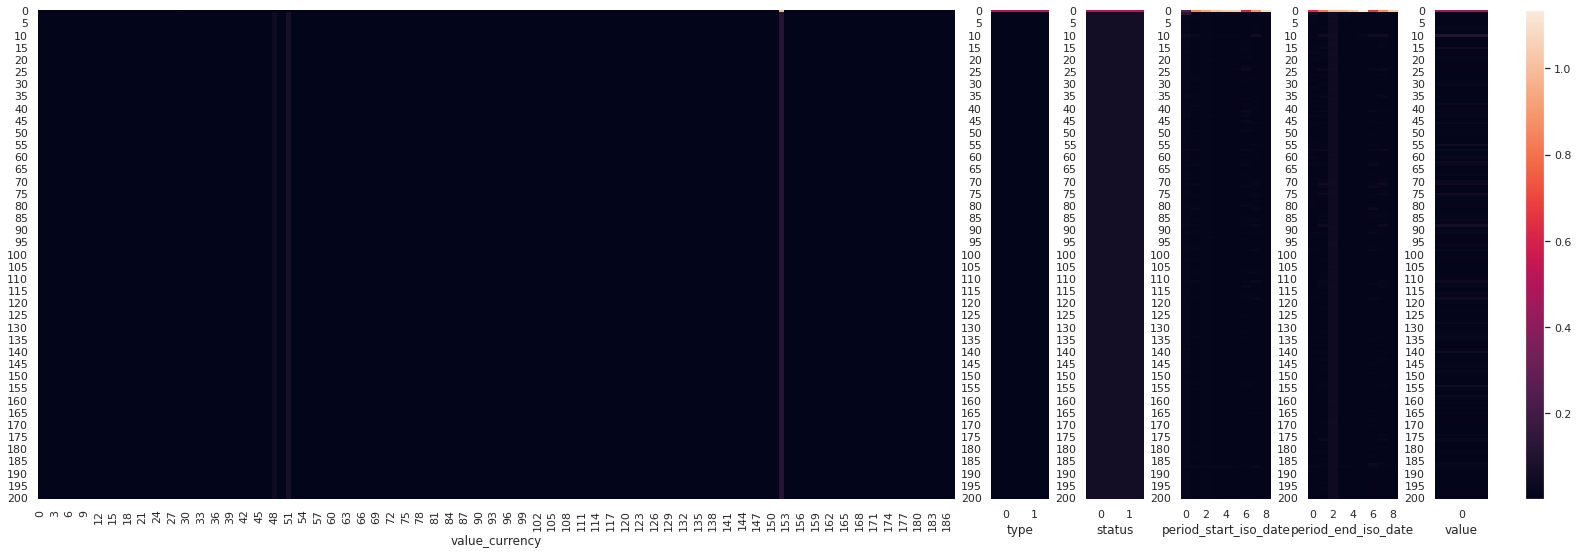

In [5]:
print(val_mae.shape)
_ = diagnostics.heatmaps(val_mae,rel,type_="fields")

vmin 1.5936801e-07 vmax 0.4716083


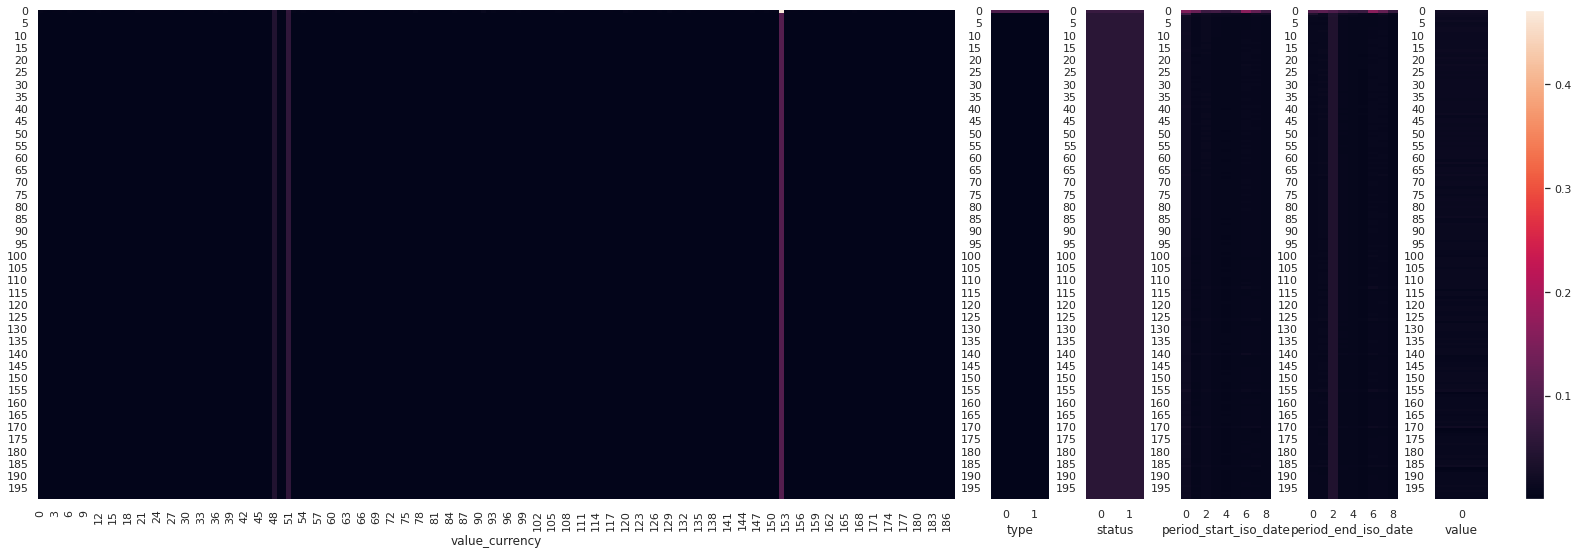

In [6]:
_ = diagnostics.heatmaps(train_mae,rel,type_="fields")

vmin -1.0001397 vmax 0.9999974
[[2.07366887e-03 1.30986434e-03 3.08138668e-03 1.51218311e-03
  2.13795202e-03]
 [7.38807726e-09 6.81770551e-09 5.48014100e-07 1.52195662e-06
  7.54164304e-08]
 [9.04045638e-09 6.18450047e-09 5.60518458e-07 2.13285853e-06
  8.75741222e-08]
 [1.02000879e-08 5.01465536e-09 5.11305359e-07 2.63445963e-06
  9.03211443e-08]
 [1.14595249e-08 4.50985871e-09 5.03018896e-07 3.16262299e-06
  9.73201111e-08]
 [1.05048059e-08 3.66203512e-09 4.49970344e-07 3.22848587e-06
  9.07556341e-08]
 [1.03351381e-08 3.44005247e-09 4.38915862e-07 3.48691060e-06
  9.22632708e-08]
 [9.70312630e-09 3.17368354e-09 4.31744667e-07 3.70857629e-06
  9.23565366e-08]
 [9.90067228e-09 3.12409854e-09 4.41161319e-07 3.93766959e-06
  9.63218412e-08]
 [9.05080277e-09 2.78153567e-09 4.11368205e-07 3.86765214e-06
  9.08142610e-08]
 [1.09614335e-08 3.19194404e-09 4.69292559e-07 4.34440199e-06
  1.06163824e-07]
 [1.09326930e-08 3.12166293e-09 4.58553160e-07 4.45305795e-06
  1.06463304e-07]
 [9.63267

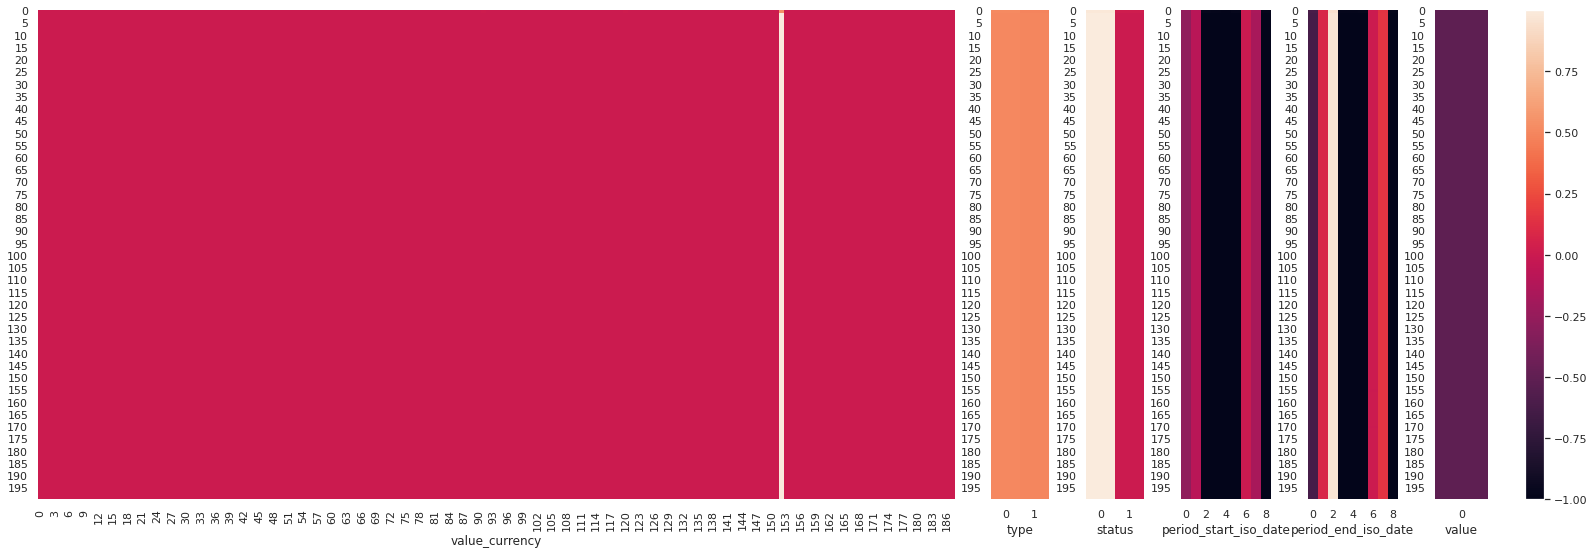

In [7]:
train_output_mean = load("output_mean_per_feature_train")
val_output_mean = load("output_mean_per_feature_val")
_ = diagnostics.heatmaps(train_output_mean,rel,type_="fields")
print(train_output_mean[:,(48,49,50,51,153)])

maxes = np.argsort(train_output_mean[-1,:188])[-4:]
maxes_vals = train_output_mean[-1,maxes]
print("maxes",maxes,"maxes_vals",maxes_vals)
for i in maxes:
    print(relspecs.rels['budget'].fields[0].codelist[i])
    

vmin -1.0001397 vmax 0.9999974


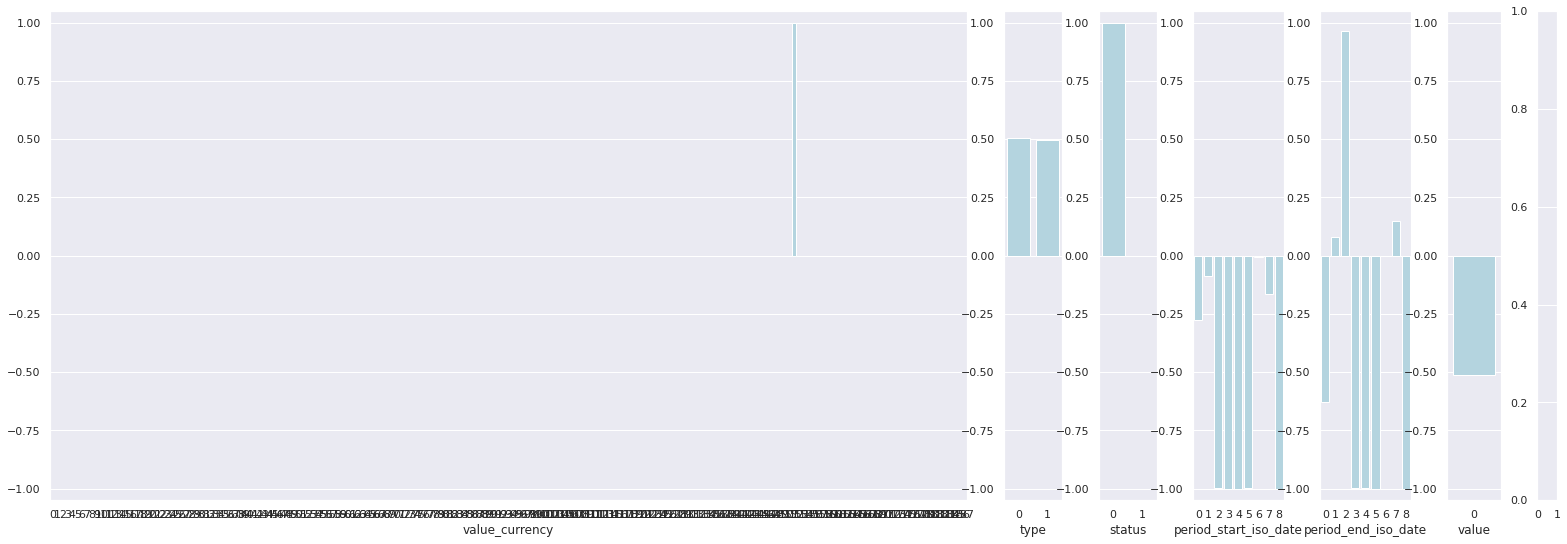

In [8]:
_ = diagnostics.barplots(train_output_mean,rel,type_="fields")


vmin -1.0163977 vmax 0.999991


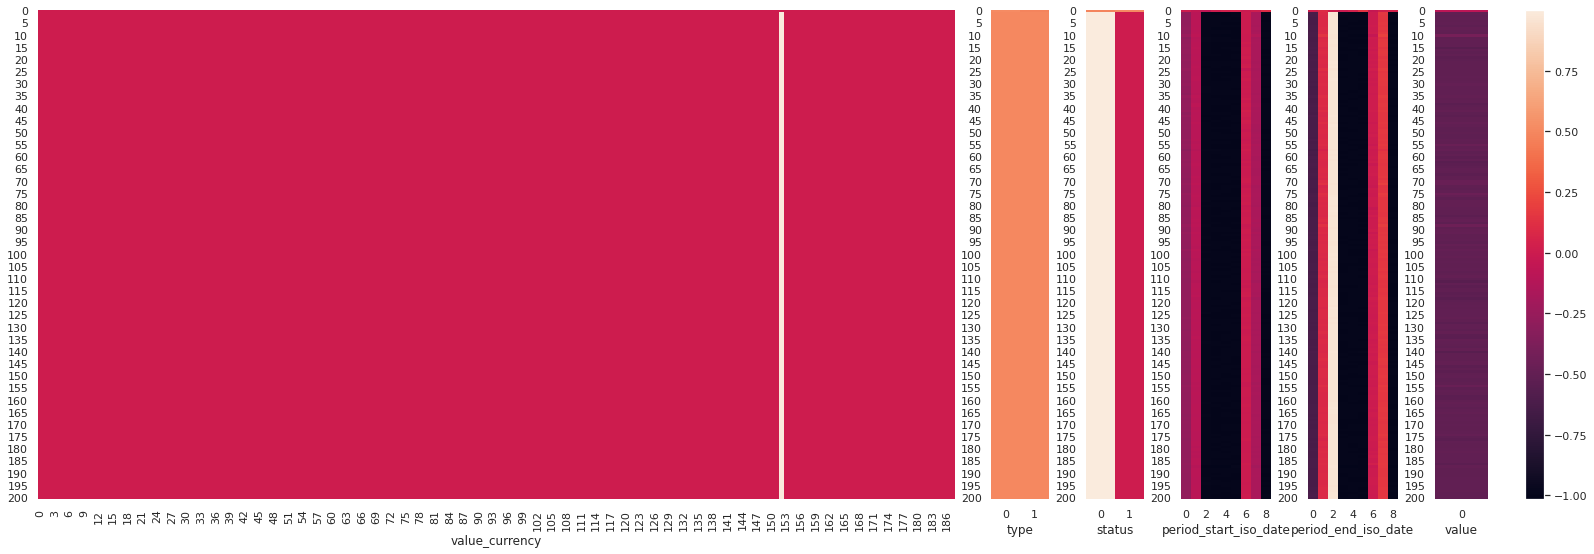

In [9]:
_ = diagnostics.heatmaps(val_output_mean,rel,type_="fields")

vmin 3.4621632e-18 vmax 0.4407847


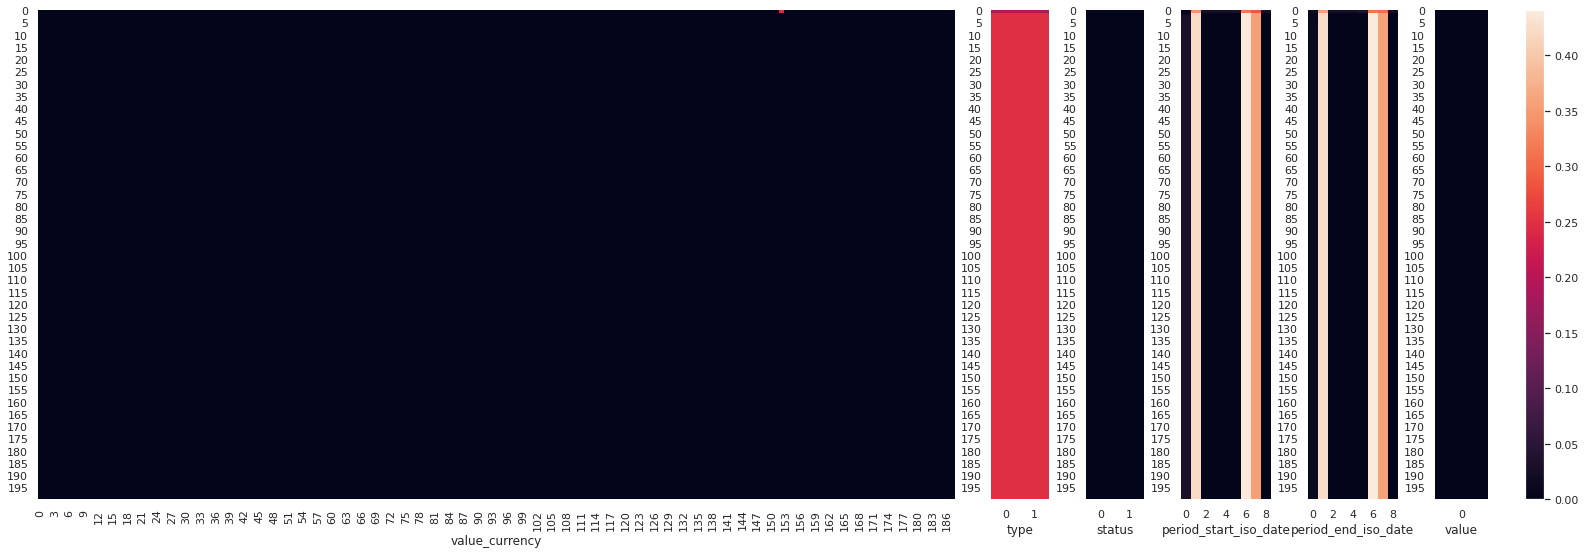

In [10]:
train_output_var = load("output_var_per_feature_train")
val_output_var = load("output_var_per_feature_val")
_ = diagnostics.heatmaps(train_output_var,rel,type_="fields")

vmin 2.9725244e-18 vmax 0.4426088


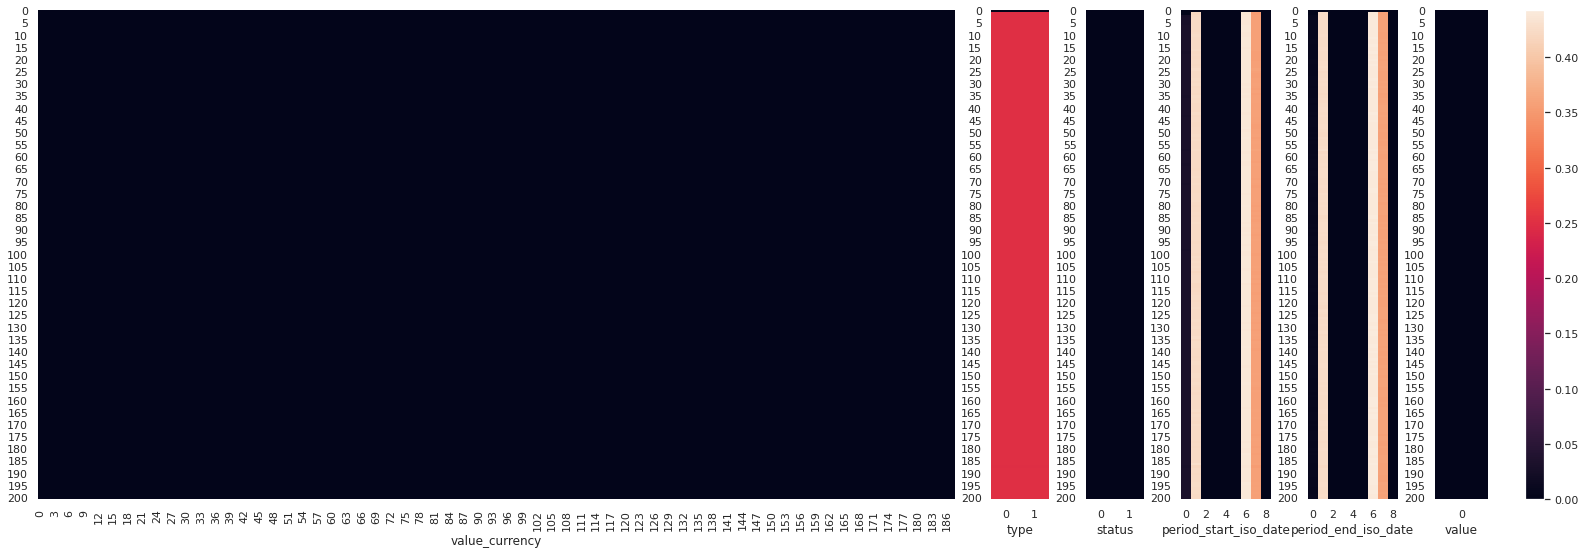

In [11]:
_ = diagnostics.heatmaps(val_output_var,rel,type_="fields")

vmin -1.0 vmax 1.0000001
vmin -1.0 vmax 1.0000001
(367044, 211)
152


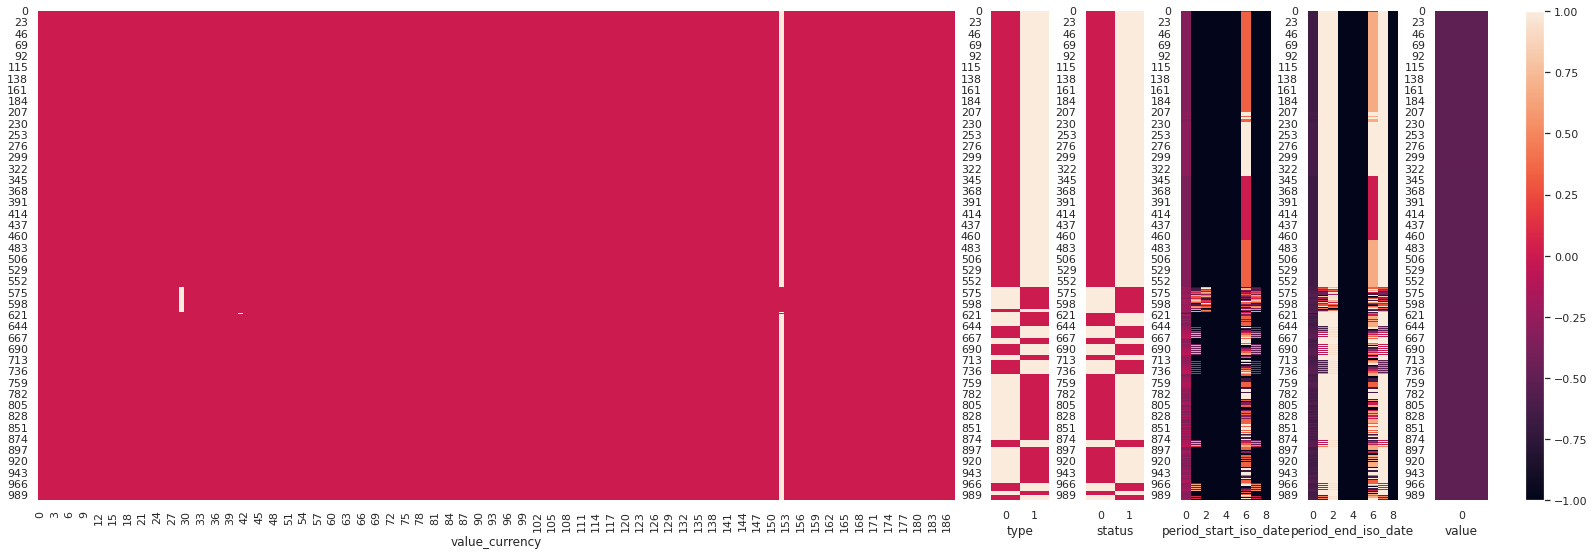

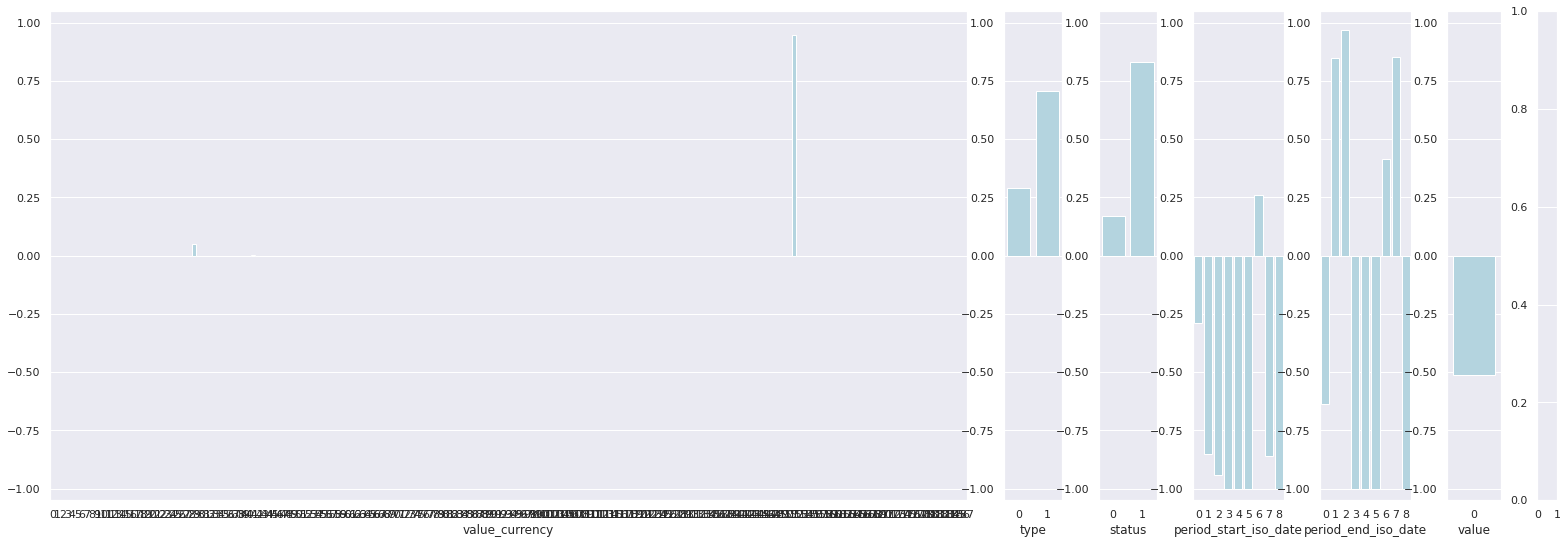

In [12]:
train_ds, test_ds = utils.load_tsets('budget',with_set_index=False)
train_ds_scaled, test_ds_scaled, scalers = rel.scale(train_ds,test_ds)
#section_orig = train_ds[550:650,27:36]
#section = train_ds_scaled[550:650,27:36]
section = train_ds_scaled[:1000,:]
_ = diagnostics.heatmaps(section,rel,type_="fields")
_ = diagnostics.barplots(section,rel,type_="fields")

import importlib
importlib.reload(utils)
utils.set_np_printoptions()
print(train_ds_scaled.shape)
#print(section_orig)
#print(section)
#print(np.vstack([list(range(train_ds.shape[1])),np.max(train_ds,axis=0)]).T)
print(np.argmax(train_ds_scaled[0,:188]))

vmin -1.0 vmax 0.96417665
maxes [[ 41  48  51 152]] maxes_vals [[[0.00179 0.0417 0.0597 0.897]]]
DKK
EUR
GBP
USD


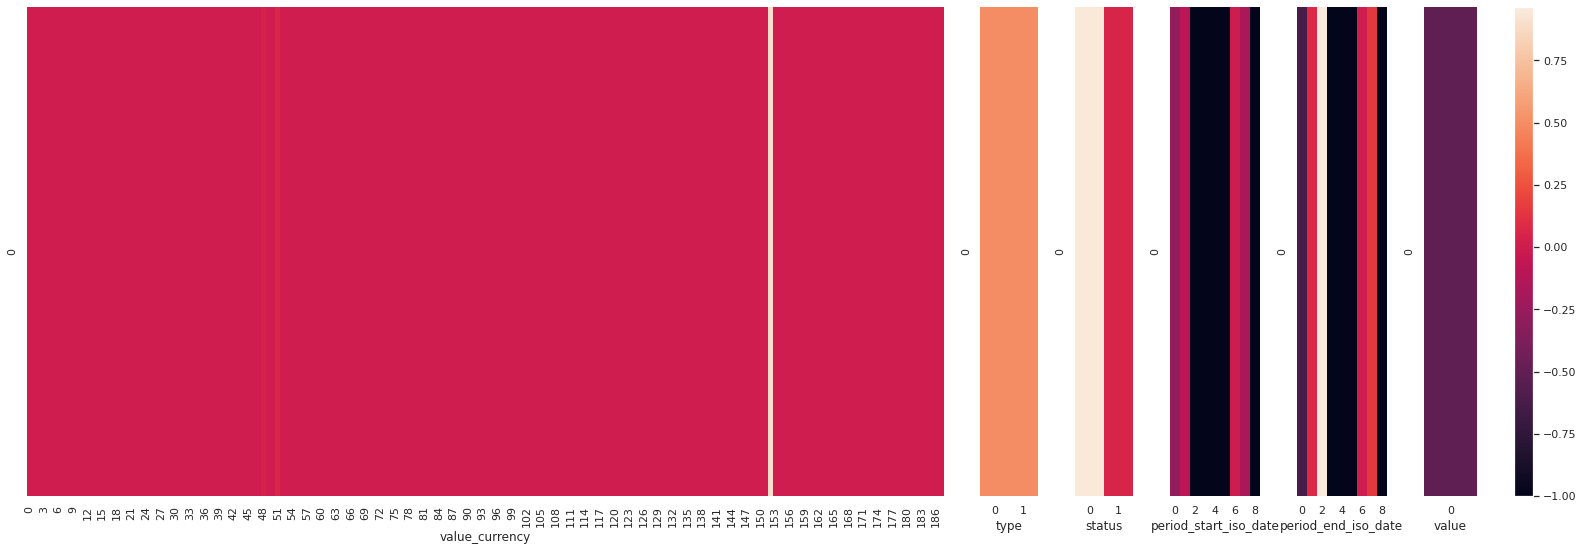

In [13]:
mean_train_ds_scaled = np.array([np.mean(train_ds_scaled,axis=0)])
_ = diagnostics.heatmaps(mean_train_ds_scaled,rel,type_="fields")
maxes = np.argsort(mean_train_ds_scaled[:,:188])[:,-4:]
maxes_vals = mean_train_ds_scaled[:,maxes]
print("maxes",maxes,"maxes_vals",maxes_vals)
importlib.reload(relspecs)
for i in maxes[0]:
    print(relspecs.rels['budget'].fields[0].codelist[i])

In [14]:
relspecs.rels['budget'].fields[0].codelist_name
len(relspecs.get_codelists()['Currency'])
188+2+2+9+9+1,rel.fields_names

(211,
 ['value_currency',
  'type',
  'status',
  'period_start_iso_date',
  'period_end_iso_date',
  'value'])

In [15]:
import persistency
db = persistency.mongo_db()
print([x['name'] for x in db.list_collections()])

['npas_tsets', 'budget', 'npas', 'budget_arrayfied', 'budget_encoded', 'codelists']


In [16]:
for k,v in db['budget_encoded'].find_one()['set_'].items():
    print(k)
    print(np.array(v).shape,np.array(v))
import utils
import pymongo
document = db['budget_arrayfied'].find().sort('_id', pymongo.DESCENDING).limit(1)[0]
npa = utils.deserialize(document['npa'])
print("npa.shape",npa.shape)

type
(1, 2) [[0 1]]
status
(1, 2) [[0 1]]
period_start_iso_date
(1, 9) [[2017    1    1    0    0    0    6    1   -1]]
period_end_iso_date
(1, 9) [[2017   12   31    0    0    0    6  365   -1]]
value_currency
(1, 188) [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
value
(1,) [7.31e+05]
npa.shape (1, 211)


In [17]:
train_dataset,test_dataset = utils.load_tsets(rel.name)
print("train_dataset.shape",train_dataset.shape)
import torch
t = torch.Tensor(train_dataset[0:1000,0:188])
import relspecs
currencies = relspecs.get_codelists()['Currency']
am = t.argmax(1)
#print(am)

train_dataset.shape (367044, 211)


vmin 7.782957e-05 vmax 5.236558
[[5.24 0.689 0.685 0.824 0.873 0.187]
 [4.36 0.314 0.37 0.00373 0.00183 0.000149]
 [4.36 0.314 0.37 0.000787 0.00095 0.000146]
 [4.36 0.314 0.37 0.000618 0.000821 9.09e-05]
 [4.36 0.314 0.37 0.000576 0.000792 0.000109]
 [4.36 0.314 0.37 0.00056 0.000783 0.000127]
 [4.36 0.314 0.37 0.000537 0.000771 0.0002]
 [4.36 0.314 0.37 0.000546 0.000779 0.000381]
 [4.36 0.314 0.37 0.000515 0.000759 0.000124]
 [4.36 0.314 0.37 0.000494 0.00075 9.02e-05]
 [4.36 0.314 0.37 0.000924 0.00146 0.0116]
 [4.36 0.314 0.37 0.000527 0.000794 0.000117]
 [4.36 0.314 0.37 0.000479 0.000742 8.87e-05]
 [4.36 0.314 0.37 0.000506 0.000763 0.000133]
 [4.36 0.314 0.37 0.000481 0.00077 9.12e-05]
 [4.36 0.314 0.37 0.000492 0.000797 0.00156]
 [4.36 0.314 0.37 0.000469 0.000744 0.000143]
 [4.36 0.314 0.37 0.000482 0.000771 0.000193]
 [4.36 0.314 0.37 0.000451 0.000745 0.000108]
 [4.36 0.314 0.37 0.000481 0.000745 0.00034]
 [4.36 0.314 0.37 0.000476 0.000747 0.000169]
 [4.36 0.314 0.37 0.000

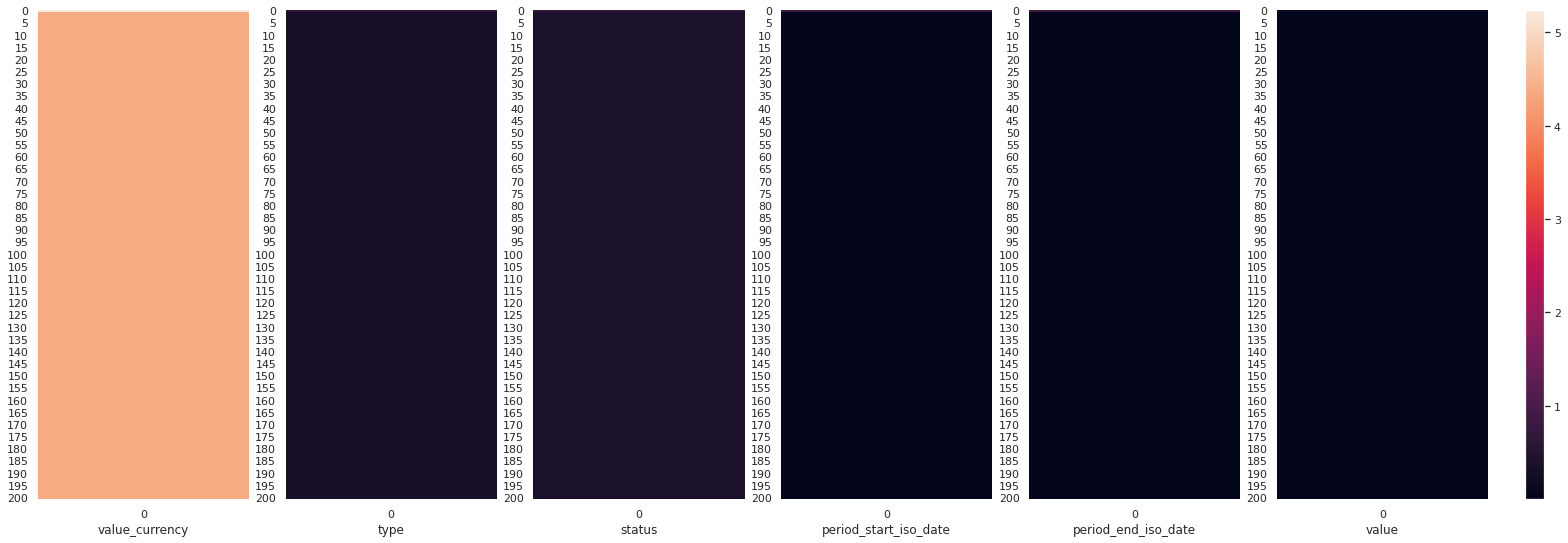

In [18]:
mean_losses_val = load("mean_losses_val")
importlib.reload(diagnostics)
_ = diagnostics.heatmaps(mean_losses_val, rel,type_="losses")
print(mean_losses_val)

190
vmin -1.0296562 vmax 1.0402222
vmin -1.0296562 vmax 1.0402222


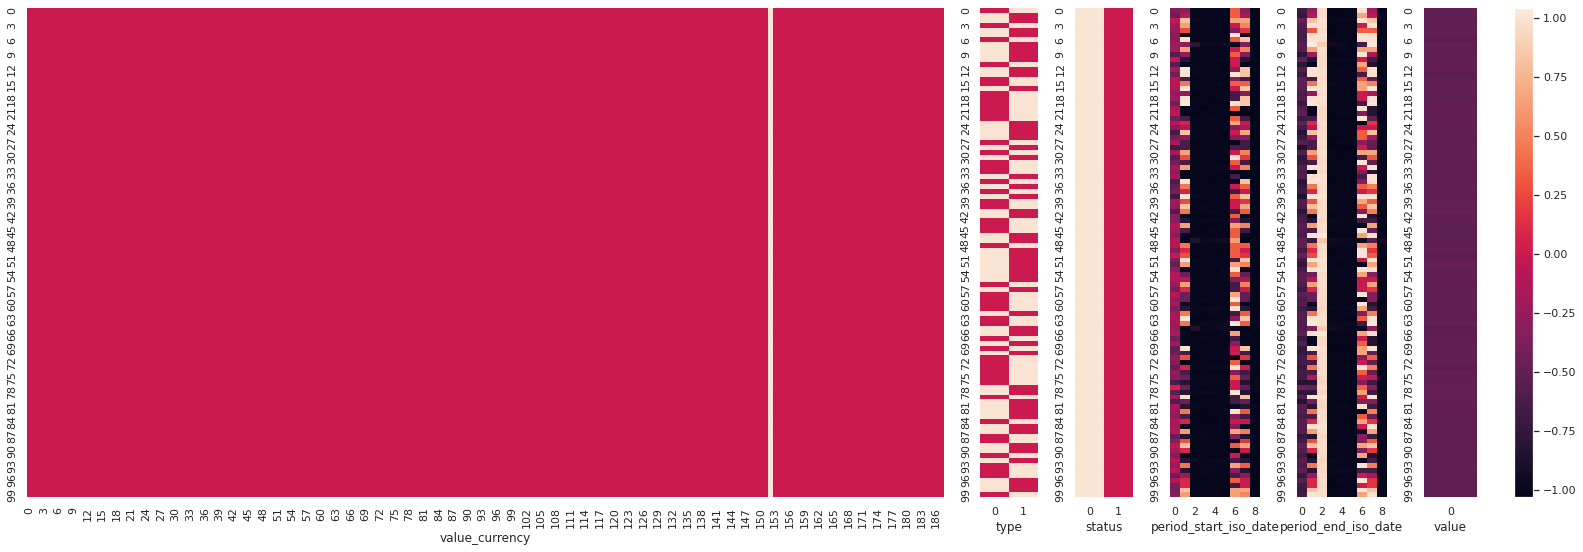

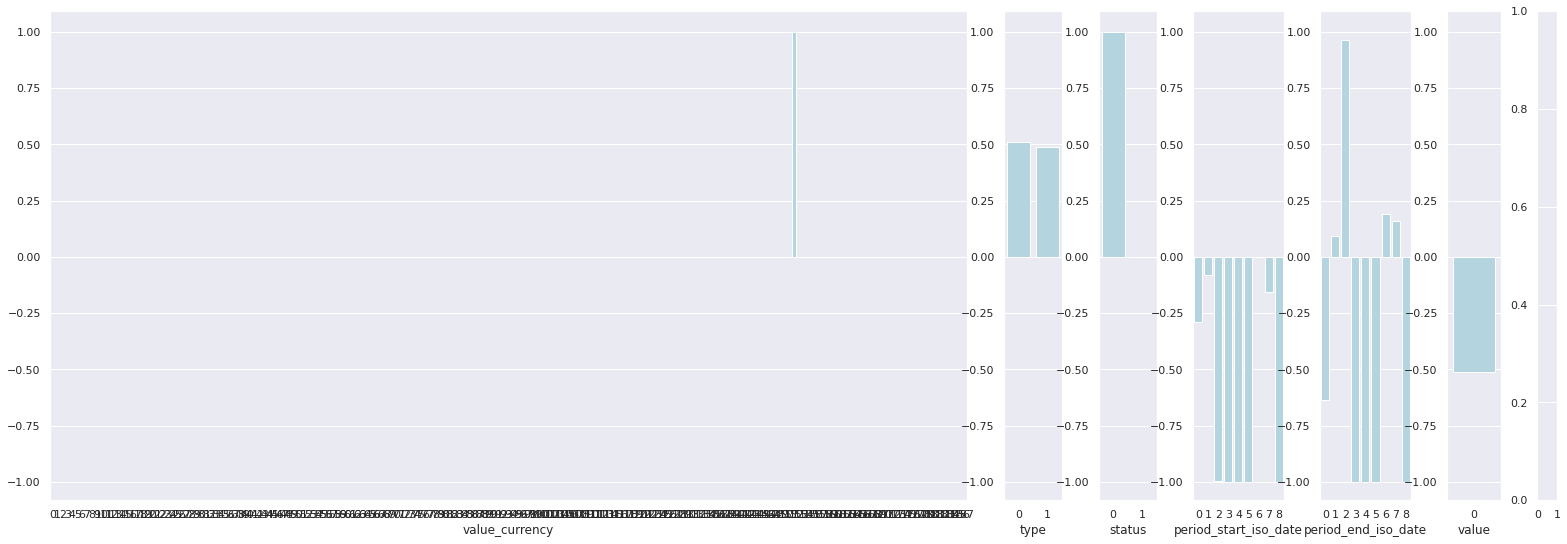

In [19]:
output_last_epoch_train = load("output_last_epoch_train")
print(np.argmax(output_last_epoch_train[0,:]))
_ = diagnostics.heatmaps(output_last_epoch_train, rel,type_="fields")
_ = diagnostics.barplots(output_last_epoch_train,rel,type_="fields")

vmin -1.0296562 vmax 1.0402222


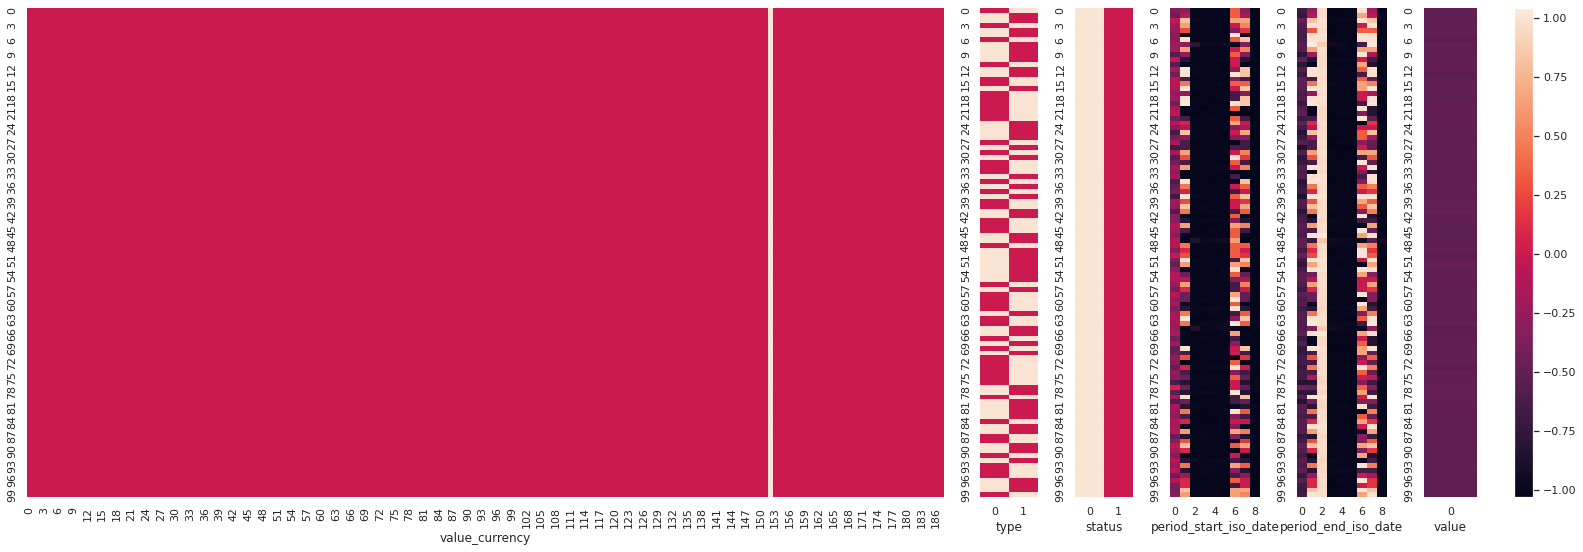

In [20]:
output_last_epoch_val = load("output_last_epoch_train")
_ = diagnostics.heatmaps(output_last_epoch_val, rel,type_="fields")
